In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 40em; }</style>"))
display(HTML("<style>div.output_scroll { width: 40em; }</style>"))

In [2]:
#a few input parameters
number_of_compounds=16
number_of_metadata=81

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import isclose

In [4]:
#histogram_file_address='./plb_short_data_sample_compounds_for_histogram_logged.csv.csv'
#std_dev_file_address='./plb_short_data_soc_vs_average_stddev_logged.csv.csv'

histogram_file_address='./compound_intensity_histograms_so_81_bin_id_less_20.csv'
std_dev_file_address='./avg_stddev_vs_soc_81_bin_id_less_20.csv'
sample_count_file_address='./so_vs_total_sample_count.csv'

In [5]:
histogram_panda=pd.read_csv(histogram_file_address,sep='¬')
std_dev_panda=pd.read_csv(std_dev_file_address,sep='¬')
sample_count_panda=pd.read_csv(sample_count_file_address,sep='¬')

<ipython-input-5-2f8b46083e59>:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  histogram_panda=pd.read_csv(histogram_file_address,sep='¬')
<ipython-input-5-2f8b46083e59>:2: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  std_dev_panda=pd.read_csv(std_dev_file_address,sep='¬')
<ipython-input-5-2f8b46083e59>:3: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  sample_count_panda=pd.read_csv(sample_count_file_address,sep='¬')


In [6]:
#add an underscore to the end of metadata with whitespace 
for index,series in sample_count_panda.iterrows():
    #if (int(index)%1000)==0:
    #    print(index)
    if series['organ'][-1]==' ':
        #print(series)
        #print(sample_count_panda.at[index,'organ'])
        sample_count_panda.at[index,'organ']=sample_count_panda.at[index,'organ']+'_'

In [7]:
sample_count_panda
#max is kind of a dummy aggregate
sample_count_series=sample_count_panda.groupby(by=['species','organ'],axis='index')['count'].max()
#sample_count_panda=sample_count_panda.unstack(level=-1)
#sample_count_panda

In [8]:
sample_count_series

species       organ             
BioRec        Plasma                  59
              Plasma _                35
              With ITSD               20
Blank         QC                      19
E. coli       conditioned medium      20
                                    ... 
mouse         serum                 1256
              spinal cord            108
              urine                    6
porcine       EDTA Plasma             20
raw material  cell _                  20
Name: count, Length: 81, dtype: int64

In [9]:
#add an underscore to the end of metadata with whitespace 
for index,series in histogram_panda.iterrows():
    #if (int(index)%1000)==0:
    #    print(index)
    if series['organ'][-1]==' ':
        #print(series)
        #print(histogram_panda.at[index,'organ'])
        histogram_panda.at[index,'organ']=histogram_panda.at[index,'organ']+'_'

In [10]:
histogram_panda[0:50]

,histo_bin_left_edge,name,count,species,organ
0,9.855697e+04,"1,5-anhydroglucitol",1,BioRec,Plasma
1,1.149831e+05,"1,5-anhydroglucitol",2,BioRec,Plasma
2,1.231962e+05,"1,5-anhydroglucitol",5,BioRec,Plasma
3,1.396224e+05,"1,5-anhydroglucitol",5,BioRec,Plasma
4,1.478354e+05,"1,5-anhydroglucitol",5,BioRec,Plasma
5,1.560485e+05,"1,5-anhydroglucitol",3,BioRec,Plasma
6,1.642616e+05,"1,5-anhydroglucitol",4,BioRec,Plasma
7,1.724747e+05,"1,5-anhydroglucitol",3,BioRec,Plasma
8,1.806878e+05,"1,5-anhydroglucitol",2,BioRec,Plasma
9,1.889009e+05,"1,5-anhydroglucitol",2,BioRec,Plasma


In [11]:
#add an underscore to the end of metadata with whitespace 
for index,series in std_dev_panda.iterrows():
    if (int(index)%1000)==0:
        print(index)
    if series['organ'][-1]==' ':
        #print(series)
        #print(histogram_panda.at[index,'organ'])
        std_dev_panda.at[index,'organ']=std_dev_panda.at[index,'organ']+'_'

0
1000


In [12]:
#add an underscore to the end of metadata with whitespace 
for index,series in sample_count_panda.iterrows():
    if (int(index)%1000)==0:
        print(index)
    if series['organ'][-1]==' ':
        #print(series)
        #print(histogram_panda.at[index,'organ'])
        sample_count_panda.at[index,'organ']=sample_count_panda.at[index,'organ']+'_'

0


In [13]:
#create a grouped_by organization of the histogram panda for later use
histo_grouped_by_soc=histogram_panda.groupby(by=['species','organ','name'],axis='index')

In [14]:
#pivot the standard deviation panda
std_dev_series=std_dev_panda.groupby(by=['species','organ','name'],axis='index')['temp_stddev'].max()
std_dev_panda=std_dev_series.unstack(level=-1)

In [15]:
std_dev_panda

name                             1,5-anhydroglucitol       alanine  \
species      organ                                                   
BioRec       Plasma                     82130.805369           NaN   
             Plasma _                   11089.299788           NaN   
             With ITSD                  12889.288966  9.640126e+04   
Blank        QC                                  NaN  1.008154e+06   
E. coli      conditioned medium                  NaN           NaN   
...                                              ...           ...   
mouse        serum                     121849.204946  8.141958e+05   
             spinal cord                 4730.001446  1.358393e+05   
             urine                               NaN           NaN   
porcine      EDTA Plasma                30136.399911           NaN   
raw material cell _                              NaN  1.677853e+07   

name                              cholesterol       glucose      glutamine  \
species      organ                                                           
BioRec       Plasma              4.324088e+05  4.900978e+06   60601.928144   
             Plasma _            3.277115e+05  2.015205e+06   87891.611426   
             With ITSD           9.295668e+04  5.221144e+05            NaN   
Blank        QC                  2.465461e+04  1.288670e+05            NaN   
E. coli      conditioned medium           NaN  1.356418e+06            NaN   
...                                       ...           ...            ...   
mouse        serum               4.185036e+05  7.413871e+06  145679.965912   
             spinal cord         1.845476e+06  1.156519e+05  187573.006498   
             urine               2.101885e+03           NaN            NaN   
porcine      EDTA Plasma         1.758574e+05  1.364994e+05   96909.453643   
raw material cell _                       NaN  2.288579e+06  563576.700947   

name                                  glycine    isoleucine       leucine  \
species      organ                                                          
BioRec       Plasma              9.501049e+04  6.110239e+04  7.177686e+04   
             Plasma _            1.271096e+05  1.003833e+05  1.709781e+05   
             With ITSD           6.199105e+04  1.459485e+04           NaN   
Blank        QC                           NaN           NaN           NaN   
E. coli      conditioned medium  1.901820e+03  3.261030e+06  1.416118e+05   
...                                       ...           ...           ...   
mouse        serum               1.088473e+05  1.862890e+05  3.349809e+05   
             spinal cord         2.205430e+05  8.483160e+03  4.309629e+04   
             urine               2.528953e+04           NaN           NaN   
porcine      EDTA Plasma         1.733090e+05  1.194500e+05  3.819156e+05   
raw material cell _              2.098009e+06  1.047334e+07  1.101898e+07   

name                                   lysine    oxoproline  palmitic acid  \
species      organ                                                           
BioRec       Plasma              7.451748e+03  2.798431e+05   1.120693e+05   
             Plasma _            1.594567e+04  3.217142e+05   1.562953e+05   
             With ITSD           1.731104e+04  4.512103e+04   2.477033e+04   
Blank        QC                  3.870228e+04  1.102520e+05   5.776220e+03   
E. coli      conditioned medium           NaN  9.076734e+03   2.434402e+04   
...                                       ...           ...            ...   
mouse        serum               5.265178e+04  5.835285e+05   1.401149e+05   
             spinal cord         2.946688e+03  9.296681e+05   3.359275e+04   
             urine               2.344436e+03  2.587477e+05   7.026133e+03   
porcine      EDTA Plasma         1.442782e+04  7.255705e+04   1.177420e+05   
raw material cell _              1.859459e+06  9.340041e+06   1.041290e+06   

name                                 phosphate       prol

In [16]:
#pivot the "max bin" panda
#we use this to optionally set the x limit on histos per compound
#originally used for a bad implementation of filling the bar data
rightmost_bin_series=histogram_panda.groupby(by=['species','organ','name'],axis='index')['histo_bin_left_edge'].max()
rightmost_bin_panda=rightmost_bin_series.unstack(level=-1)

In [17]:
rightmost_bin_panda

name                             1,5-anhydroglucitol       alanine  \
species      organ                                                   
BioRec       Plasma                    583128.718121           NaN   
             Plasma _                  299411.094269           NaN   
             With ITSD                 386678.668992  4.916464e+05   
Blank        QC                                  NaN  7.258709e+06   
E. coli      conditioned medium                  NaN           NaN   
...                                              ...           ...   
mouse        serum                     718910.309181  4.070979e+06   
             spinal cord                19393.005930  3.395982e+05   
             urine                               NaN           NaN   
porcine      EDTA Plasma                93422.839724           NaN   
raw material cell _                              NaN  6.208055e+07   

name                              cholesterol       glucose     glutamine  \
species      organ                                                          
BioRec       Plasma              1.383708e+06  1.421284e+07  1.272640e+05   
             Plasma _            1.441931e+06  5.844096e+06  4.043014e+05   
             With ITSD           1.803360e+06  2.871629e+06           NaN   
Blank        QC                  4.068011e+05  5.283548e+05           NaN   
E. coli      conditioned medium           NaN  2.441552e+06           NaN   
...                                       ...           ...           ...   
mouse        serum               2.929525e+06  3.336242e+07  9.177838e+05   
             spinal cord         7.566452e+06  6.245202e+05  6.002336e+05   
             urine               6.726031e+03           NaN           NaN   
porcine      EDTA Plasma         1.037559e+06  5.569174e+06  1.453642e+05   
raw material cell _                       NaN  5.721448e+06  1.916161e+06   

name                                  glycine    isoleucine       leucine  \
species      organ                                                          
BioRec       Plasma              6.745745e+05  3.727246e+05  4.450165e+05   
             Plasma _            4.321725e+05  4.617631e+05  9.403796e+05   
             With ITSD           2.665615e+05  1.386511e+05           NaN   
Blank        QC                           NaN           NaN           NaN   
E. coli      conditioned medium  4.944732e+03  2.380552e+07  7.462943e+06   
...                                       ...           ...           ...   
mouse        serum               8.707788e+05  1.527570e+06  2.579353e+06   
             spinal cord         1.345312e+06  5.174727e+04  1.680755e+05   
             urine               5.816592e+04           NaN           NaN   
porcine      EDTA Plasma         6.412431e+05  7.883700e+05  2.176919e+06   
raw material cell _              7.133230e+06  3.246736e+07  4.077022e+07   

name                                   lysine    oxoproline  palmitic acid  \
species      organ                                                           
BioRec       Plasma              2.682629e+04  1.735027e+06   6.051743e+05   
             Plasma _            6.218812e+04  1.061657e+06   6.095515e+05   
             With ITSD           6.578197e+04  6.903518e+05   2.179789e+05   
Blank        QC                  2.438244e+05  3.748568e+05   2.541537e+04   
E. coli      conditioned medium           NaN  3.086090e+04   1.436297e+05   
...                                       ...           ...            ...   
mouse        serum               5.949651e+05  3.967994e+06   9.247586e+05   
             spinal cord         1.178675e+04  6.228776e+06   2.721013e+05   
             urine               1.594216e+04  1.060865e+06   5.410123e+04   
porcine      EDTA Plasma         6.492517e+04  6.892920e+05   6.475810e+05   
raw material cell _              7.809729e+06  2.988813e+07   4.685805e+06   

name                                phosphate       proline  stearic a

In [18]:
max_value_series=rightmost_bin_panda.max()
max_value_series

name
1,5-anhydroglucitol    1.588471e+07
alanine                6.208055e+07
cholesterol            2.932568e+07
glucose                4.709549e+07
glutamine              4.404882e+07
glycine                1.076421e+07
isoleucine             3.246736e+07
leucine                6.384016e+07
lysine                 9.625226e+06
oxoproline             5.953903e+07
palmitic acid          4.847977e+06
phosphate              3.111880e+07
proline                4.222070e+07
stearic acid           3.053663e+07
tryptophan 3TMS        3.483163e+07
tyrosine               3.533820e+07
valine                 4.013678e+07
z mstfa artifact       1.230577e+09
dtype: float64

In [19]:
#the overall organization is creating a panda with this structure

#-------different compounds---------#
#
#
#
#different s,o,c
#
#

#each entry of this panda has class histo_info (should be HistoInfo)
class histo_info:
    def __init__(self):
        self.x=list()
        self.height=list()
        self.width=None
        self.species_organ=None
        self.compound=None
        self.total_sample_count=None
        self.pre_manipulation_average=None
        self.compound_max=None
        
    
    #accessors are an old habit
    def assign_x(self,temp_x):
        self.x=temp_x
    
    def assign_height(self,temp_height):
        self.height=temp_height
        
    def assign_width(self,temp_width):
        self.width=temp_width

In [20]:
#create an empty panda
histo_info_panda=pd.DataFrame(columns=rightmost_bin_panda.columns,index=rightmost_bin_panda.index,data=np.nan)
histo_info_panda

name                             1,5-anhydroglucitol  alanine  cholesterol  \
species      organ                                                           
BioRec       Plasma                              NaN      NaN          NaN   
             Plasma _                            NaN      NaN          NaN   
             With ITSD                           NaN      NaN          NaN   
Blank        QC                                  NaN      NaN          NaN   
E. coli      conditioned medium                  NaN      NaN          NaN   
...                                              ...      ...          ...   
mouse        serum                               NaN      NaN          NaN   
             spinal cord                         NaN      NaN          NaN   
             urine                               NaN      NaN          NaN   
porcine      EDTA Plasma                         NaN      NaN          NaN   
raw material cell _                              NaN      NaN          NaN   

name                             glucose  glutamine  glycine  isoleucine  \
species      organ                                                         
BioRec       Plasma                  NaN        NaN      NaN         NaN   
             Plasma _                NaN        NaN      NaN         NaN   
             With ITSD               NaN        NaN      NaN         NaN   
Blank        QC                      NaN        NaN      NaN         NaN   
E. coli      conditioned medium      NaN        NaN      NaN         NaN   
...                                  ...        ...      ...         ...   
mouse        serum                   NaN        NaN      NaN         NaN   
             spinal cord             NaN        NaN      NaN         NaN   
             urine                   NaN        NaN      NaN         NaN   
porcine      EDTA Plasma             NaN        NaN      NaN         NaN   
raw material cell _                  NaN        NaN      NaN         NaN   

name                             leucine  lysine  oxoproline  palmitic acid  \
species      organ                                                            
BioRec       Plasma                  NaN     NaN         NaN            NaN   
             Plasma _                NaN     NaN         NaN            NaN   
             With ITSD               NaN     NaN         NaN            NaN   
Blank        QC                      NaN     NaN         NaN            NaN   
E. coli      conditioned medium      NaN     NaN         NaN            NaN   
...                                  ...     ...         ...            ...   
mouse        serum                   NaN     NaN         NaN            NaN   
             spinal cord             NaN     NaN         NaN            NaN   
             urine                   NaN     NaN         NaN            NaN   
porcine      EDTA Plasma             NaN     NaN         NaN            NaN   
raw material cell _                  NaN     NaN         NaN            NaN   

name                             phosphate  proline  stearic acid  \
species      organ                                                  
BioRec       Plasma                    NaN      NaN           NaN   
             Plasma _                  NaN      NaN           NaN   
             With ITSD                 NaN      NaN           NaN   
Blank        QC                        NaN      NaN           NaN   
E. coli      conditioned medium        NaN      NaN           NaN   
...                                    ...      ...           ...   
mouse        serum                     NaN      NaN           NaN   
             spinal cord               NaN      NaN           NaN   
             urine                     NaN      NaN           NaN   
porcine      EDTA Plasma               NaN      NaN           NaN   
raw material cell _                    NaN      NaN           NaN   

name                             tryptophan 3TMS  tyrosine  valine  \


In [21]:
#fill panda with empty histo_info, (setting data=histo_info() will create the same object at every entry)
for index,series in histo_info_panda.iterrows():
    for temp_name in series.index:
        histo_info_panda.at[index,temp_name]=histo_info()
histo_info_panda

name                                                        1,5-anhydroglucitol  \
species      organ                                                                
BioRec       Plasma              <__main__.histo_info object at 0x7f9cdb1b35e0>   
             Plasma _            <__main__.histo_info object at 0x7f9cdb1c9700>   
             With ITSD           <__main__.histo_info object at 0x7f9cdb1b3f10>   
Blank        QC                  <__main__.histo_info object at 0x7f9cdb1c9580>   
E. coli      conditioned medium  <__main__.histo_info object at 0x7f9cdb1c9a30>   
...                                                                         ...   
mouse        serum               <__main__.histo_info object at 0x7f9cdb017e80>   
             spinal cord         <__main__.histo_info object at 0x7f9cdb017b20>   
             urine               <__main__.histo_info object at 0x7f9cdb017100>   
porcine      EDTA Plasma         <__main__.histo_info object at 0x7f9cdb34aee0>   
raw material cell _              <__main__.histo_info object at 0x7f9cdb1d9970>   

name                                                                    alanine  \
species      organ                                                                
BioRec       Plasma              <__main__.histo_info object at 0x7f9cdb1c9430>   
             Plasma _            <__main__.histo_info object at 0x7f9cdb1c9af0>   
             With ITSD           <__main__.histo_info object at 0x7f9cdb1e6ac0>   
Blank        QC                  <__main__.histo_info object at 0x7f9cdb1e6eb0>   
E. coli      conditioned medium  <__main__.histo_info object at 0x7f9cdb2a7250>   
...                                                                         ...   
mouse        serum               <__main__.histo_info object at 0x7f9cdb1d9640>   
             spinal cord         <__main__.histo_info object at 0x7f9cdb1d99a0>   
             urine               <__main__.histo_info object at 0x7f9cdb1d9d00>   
porcine      EDTA Plasma         <__main__.histo_info object at 0x7f9cdb01d0a0>   
raw material cell _              <__main__.histo_info object at 0x7f9cdb01d400>   

name                                                                cholesterol  \
species      organ                                                                
BioRec       Plasma              <__main__.histo_info object at 0x7f9cdb1c9520>   
             Plasma _            <__main__.histo_info object at 0x7f9cdb1c9b20>   
             With ITSD           <__main__.histo_info object at 0x7f9cdb1e6b80>   
Blank        QC                  <__main__.histo_info object at 0x7f9cdb1e6ee0>   
E. coli      conditioned medium  <__main__.histo_info object at 0x7f9cdb2a7280>   
...                                                                         ...   
mouse        serum               <__main__.histo_info object at 0x7f9cdb1d9670>   
             spinal cord         <__main__.histo_info object at 0x7f9cdb1d99d0>   
             urine               <__main__.histo_info object at 0x7f9cdb1d9d30>   
porcine      EDTA Plasma         <__main__.histo_info object at 0x7f9cdb01d0d0>   
raw material cell _              <__main__.histo_info object at 0x7f9cdb01d430>   

name                                                                    glucose  \
species      organ                                                                
BioRec       Plasma              <__main__.histo_info object at 0x7f9cdb1c94c0>   
             Plasma _            <__main__.histo_info object at 0x7f9cdb1c9be0>   
             With ITSD           <__main__.histo_info object at 0x7f9cdb1e6bb0>   
Blank        QC                  <__main__.histo_info object at 0x7f9cdb1e6f10>   
E. coli      conditioned medium  <__main__.histo_info object at 0x7f9cdb2a72b0>   
...                                                                         ...   
mouse        serum               <__main__.histo_info object at 0x7f9cdb1d96a0>   
             

In [22]:
def build_x_list(temp_max_bin,temp_std_dev):
    temp_list=[(temp_max_bin-i*temp_std_dev) for i in range(int(temp_max_bin//temp_std_dev)+1)]
    temp_list.append(-1*temp_std_dev)
    return temp_list

In [23]:
#this is an absolutely ridiculous way to do things
#basically, i thought that matplotlib bar worked the same way as other bar graphs - 
#that all bars would automatically be placed next to one another and given some label
#instead, in matplotlib, you give a location. therefore, you dont actually have to have blank locations with 0 as
#the height
#so this whole thing could be rewritten to be faster/less absurd, just parsing out each of the x/height pairs
#from the panda instead of creating our own set of xs, matching them to the ones from carrot, plugging in the 
#height, etc
'''
for index,series in rightmost_bin_panda.iterrows():
    for temp_name in series.index:
        histo_info_panda.at[index,temp_name].species_organ=index
        histo_info_panda.at[index,temp_name].compound=temp_name
        try:
            histo_info_panda.at[index,temp_name].x=build_x_list(rightmost_bin_panda[temp_name][index],std_dev_panda[temp_name][index]/10)
        except ValueError:
            histo_info_panda.at[index,temp_name].x='no_std_dev'
            histo_info_panda.height='no_std_dev'
            histo_info_panda.width='no_std_dev'

            
for index,series in histo_info_panda.iterrows():
    for temp_name in series.index:
        if histo_info_panda.at[index,temp_name].x=='no_std_dev':
            continue
        else:
            temp_group_key=tuple([index[0],index[1],temp_name])
            for temp_element in histo_info_panda.at[index,temp_name].x:
                found_a_match=False
                for sub_index,sub_series in histo_grouped_by_soc.get_group(temp_group_key).iterrows():
                    if isclose(temp_element,sub_series['histo_bin_left_edge'],abs_tol=100):
                        histo_info_panda.at[index,temp_name].height.append(sub_series['count'])
                        found_a_match=True
                if found_a_match==False:
                    histo_info_panda.at[index,temp_name].height.append(0)
                    
for index,series in histo_info_panda.iterrows():
    for temp_name in series.index:
        if histo_info_panda.at[index,temp_name].x=='no_std_dev':
            continue
        else:
            histo_info_panda.at[index,temp_name].width=std_dev_panda.at[index,temp_name]/10
'''

"\nfor index,series in rightmost_bin_panda.iterrows():\n    for temp_name in series.index:\n        histo_info_panda.at[index,temp_name].species_organ=index\n        histo_info_panda.at[index,temp_name].compound=temp_name\n        try:\n            histo_info_panda.at[index,temp_name].x=build_x_list(rightmost_bin_panda[temp_name][index],std_dev_panda[temp_name][index]/10)\n        except ValueError:\n            histo_info_panda.at[index,temp_name].x='no_std_dev'\n            histo_info_panda.height='no_std_dev'\n            histo_info_panda.width='no_std_dev'\n\n            \nfor index,series in histo_info_panda.iterrows():\n    for temp_name in series.index:\n        if histo_info_panda.at[index,temp_name].x=='no_std_dev':\n            continue\n        else:\n            temp_group_key=tuple([index[0],index[1],temp_name])\n            for temp_element in histo_info_panda.at[index,temp_name].x:\n                found_a_match=False\n                for sub_index,sub_series in histo_gr

In [24]:
#should vectorize
#function that does the internal work and applymap
for index,series in histo_info_panda.iterrows():
    for temp_name in series.index:
        temp_group_key=tuple([index[0],index[1],temp_name])
        #print(temp_group_key)
        #print(histo_grouped_by_soc.get_group(temp_group_key))
        #hold=input('hold')
        histo_info_panda.at[index,temp_name].species_organ=index
        histo_info_panda.at[index,temp_name].compound=temp_name
        
        
        try:
            histo_info_panda.at[index,temp_name].x=histo_grouped_by_soc.get_group(temp_group_key)['histo_bin_left_edge'].to_list()
            histo_info_panda.at[index,temp_name].height=histo_grouped_by_soc.get_group(temp_group_key)['count'].to_list()
            histo_info_panda.at[index,temp_name].width=std_dev_panda.at[index,temp_name]/10
            histo_info_panda.at[index,temp_name].x.append(-histo_info_panda.at[index,temp_name].width)
            histo_info_panda.at[index,temp_name].height.append(0)
            histo_info_panda.at[index,temp_name].species_organ
        except KeyError:
            histo_info_panda.at[index,temp_name].x=[0]
            histo_info_panda.at[index,temp_name].height=[0]
            histo_info_panda.at[index,temp_name].width=-1
            histo_info_panda.at[index,temp_name].x.append(-histo_info_panda.at[index,temp_name].width)
            histo_info_panda.at[index,temp_name].height.append(0)

In [25]:
for index,series in histo_info_panda.iterrows():
    for temp_name in series.index:
        if pd.isnull(histo_info_panda.at[index,temp_name].x[0]):
            histo_info_panda.at[index,temp_name].x=[0]
            histo_info_panda.at[index,temp_name].height=[0]
            histo_info_panda.at[index,temp_name].width=-1
            histo_info_panda.at[index,temp_name].x.append(-histo_info_panda.at[index,temp_name].width)
            histo_info_panda.at[index,temp_name].height.append(0)

In [26]:
def find_average_for_bar(temp_histo_info):
    #total_sum=0
    weighted_positions=[temp_histo_info.x[i]*temp_histo_info.height[i] for i in range(len(temp_histo_info.x))]
    total_sum=sum(weighted_positions)
    try:
        average=total_sum/sum(temp_histo_info.height)
    except ZeroDivisionError:
        average=0
    temp_histo_info.pre_manipulation_average=average
    return temp_histo_info

In [27]:
histo_info_panda.applymap(find_average_for_bar)

name                                                        1,5-anhydroglucitol  \
species      organ                                                                
BioRec       Plasma              <__main__.histo_info object at 0x7f9cdb1b35e0>   
             Plasma _            <__main__.histo_info object at 0x7f9cdb1c9700>   
             With ITSD           <__main__.histo_info object at 0x7f9cdb1b3f10>   
Blank        QC                  <__main__.histo_info object at 0x7f9cdb1c9580>   
E. coli      conditioned medium  <__main__.histo_info object at 0x7f9cdb1c9a30>   
...                                                                         ...   
mouse        serum               <__main__.histo_info object at 0x7f9cdb017e80>   
             spinal cord         <__main__.histo_info object at 0x7f9cdb017b20>   
             urine               <__main__.histo_info object at 0x7f9cdb017100>   
porcine      EDTA Plasma         <__main__.histo_info object at 0x7f9cdb34aee0>   
raw material cell _              <__main__.histo_info object at 0x7f9cdb1d9970>   

name                                                                    alanine  \
species      organ                                                                
BioRec       Plasma              <__main__.histo_info object at 0x7f9cdb1c9430>   
             Plasma _            <__main__.histo_info object at 0x7f9cdb1c9af0>   
             With ITSD           <__main__.histo_info object at 0x7f9cdb1e6ac0>   
Blank        QC                  <__main__.histo_info object at 0x7f9cdb1e6eb0>   
E. coli      conditioned medium  <__main__.histo_info object at 0x7f9cdb2a7250>   
...                                                                         ...   
mouse        serum               <__main__.histo_info object at 0x7f9cdb1d9640>   
             spinal cord         <__main__.histo_info object at 0x7f9cdb1d99a0>   
             urine               <__main__.histo_info object at 0x7f9cdb1d9d00>   
porcine      EDTA Plasma         <__main__.histo_info object at 0x7f9cdb01d0a0>   
raw material cell _              <__main__.histo_info object at 0x7f9cdb01d400>   

name                                                                cholesterol  \
species      organ                                                                
BioRec       Plasma              <__main__.histo_info object at 0x7f9cdb1c9520>   
             Plasma _            <__main__.histo_info object at 0x7f9cdb1c9b20>   
             With ITSD           <__main__.histo_info object at 0x7f9cdb1e6b80>   
Blank        QC                  <__main__.histo_info object at 0x7f9cdb1e6ee0>   
E. coli      conditioned medium  <__main__.histo_info object at 0x7f9cdb2a7280>   
...                                                                         ...   
mouse        serum               <__main__.histo_info object at 0x7f9cdb1d9670>   
             spinal cord         <__main__.histo_info object at 0x7f9cdb1d99d0>   
             urine               <__main__.histo_info object at 0x7f9cdb1d9d30>   
porcine      EDTA Plasma         <__main__.histo_info object at 0x7f9cdb01d0d0>   
raw material cell _              <__main__.histo_info object at 0x7f9cdb01d430>   

name                                                                    glucose  \
species      organ                                                                
BioRec       Plasma              <__main__.histo_info object at 0x7f9cdb1c94c0>   
             Plasma _            <__main__.histo_info object at 0x7f9cdb1c9be0>   
             With ITSD           <__main__.histo_info object at 0x7f9cdb1e6bb0>   
Blank        QC                  <__main__.histo_info object at 0x7f9cdb1e6f10>   
E. coli      conditioned medium  <__main__.histo_info object at 0x7f9cdb2a72b0>   
...                                                                         ...   
mouse        serum               <__main__.histo_info object at 0x7f9cdb1d96a0>   
             

In [28]:
histo_info_panda

name                                                        1,5-anhydroglucitol  \
species      organ                                                                
BioRec       Plasma              <__main__.histo_info object at 0x7f9cdb1b35e0>   
             Plasma _            <__main__.histo_info object at 0x7f9cdb1c9700>   
             With ITSD           <__main__.histo_info object at 0x7f9cdb1b3f10>   
Blank        QC                  <__main__.histo_info object at 0x7f9cdb1c9580>   
E. coli      conditioned medium  <__main__.histo_info object at 0x7f9cdb1c9a30>   
...                                                                         ...   
mouse        serum               <__main__.histo_info object at 0x7f9cdb017e80>   
             spinal cord         <__main__.histo_info object at 0x7f9cdb017b20>   
             urine               <__main__.histo_info object at 0x7f9cdb017100>   
porcine      EDTA Plasma         <__main__.histo_info object at 0x7f9cdb34aee0>   
raw material cell _              <__main__.histo_info object at 0x7f9cdb1d9970>   

name                                                                    alanine  \
species      organ                                                                
BioRec       Plasma              <__main__.histo_info object at 0x7f9cdb1c9430>   
             Plasma _            <__main__.histo_info object at 0x7f9cdb1c9af0>   
             With ITSD           <__main__.histo_info object at 0x7f9cdb1e6ac0>   
Blank        QC                  <__main__.histo_info object at 0x7f9cdb1e6eb0>   
E. coli      conditioned medium  <__main__.histo_info object at 0x7f9cdb2a7250>   
...                                                                         ...   
mouse        serum               <__main__.histo_info object at 0x7f9cdb1d9640>   
             spinal cord         <__main__.histo_info object at 0x7f9cdb1d99a0>   
             urine               <__main__.histo_info object at 0x7f9cdb1d9d00>   
porcine      EDTA Plasma         <__main__.histo_info object at 0x7f9cdb01d0a0>   
raw material cell _              <__main__.histo_info object at 0x7f9cdb01d400>   

name                                                                cholesterol  \
species      organ                                                                
BioRec       Plasma              <__main__.histo_info object at 0x7f9cdb1c9520>   
             Plasma _            <__main__.histo_info object at 0x7f9cdb1c9b20>   
             With ITSD           <__main__.histo_info object at 0x7f9cdb1e6b80>   
Blank        QC                  <__main__.histo_info object at 0x7f9cdb1e6ee0>   
E. coli      conditioned medium  <__main__.histo_info object at 0x7f9cdb2a7280>   
...                                                                         ...   
mouse        serum               <__main__.histo_info object at 0x7f9cdb1d9670>   
             spinal cord         <__main__.histo_info object at 0x7f9cdb1d99d0>   
             urine               <__main__.histo_info object at 0x7f9cdb1d9d30>   
porcine      EDTA Plasma         <__main__.histo_info object at 0x7f9cdb01d0d0>   
raw material cell _              <__main__.histo_info object at 0x7f9cdb01d430>   

name                                                                    glucose  \
species      organ                                                                
BioRec       Plasma              <__main__.histo_info object at 0x7f9cdb1c94c0>   
             Plasma _            <__main__.histo_info object at 0x7f9cdb1c9be0>   
             With ITSD           <__main__.histo_info object at 0x7f9cdb1e6bb0>   
Blank        QC                  <__main__.histo_info object at 0x7f9cdb1e6f10>   
E. coli      conditioned medium  <__main__.histo_info object at 0x7f9cdb2a72b0>   
...                                                                         ...   
mouse        serum               <__main__.histo_info object at 0x7f9cdb1d96a0>   
             

In [29]:
#want to have a column with the difference between the counts that a metadata has 
#and the total counts that are displayed in the histo
#step 1 figure out the counts in the histo
#step 2 figure out the difference between that and the counts for that metadata
#step 3 add that column to each histo_info

def append_missing_annotations_column(temp_histo_info):
    #we refer to the global sample count
    
    #print(temp_histo_info.species_organ)
    if temp_histo_info.x=='no_std_dev':
        return temp_histo_info
    else:

       
        samples_possible=sample_count_series[temp_histo_info.species_organ]
        samples_present=sum(temp_histo_info.height)
        if(temp_histo_info.species_organ==('BioRec', 'Plasma')):
            print(samples_possible)
            print(samples_present)
            print(temp_histo_info.height)
            
        
        
        
        temp_histo_info.height[-1]=abs(samples_possible-samples_present)

        temp_histo_info.total_sample_count=samples_possible
        return temp_histo_info

#for index, series in histo_info_panda.iterrows():
    

In [30]:
histo_info_panda.applymap(append_missing_annotations_column)

59
46
[1, 2, 5, 5, 5, 3, 4, 3, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0]
59
0
[0, 0]
59
53
[27, 1, 2, 4, 2, 1, 1, 1, 3, 4, 3, 1, 1, 2, 0]
59
10
[2, 1, 1, 1, 2, 1, 1, 1, 0]
59
4
[1, 1, 1, 1, 0]
59
58
[1, 2, 5, 3, 1, 4, 10, 8, 3, 2, 1, 4, 2, 3, 2, 2, 1, 1, 1, 1, 1, 0]
59
58
[3, 1, 3, 4, 2, 8, 5, 5, 4, 2, 5, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0]
59
44
[1, 1, 4, 1, 4, 3, 3, 2, 3, 1, 1, 4, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0]
59
14
[1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 0]
59
58
[1, 2, 4, 3, 6, 6, 5, 4, 7, 3, 1, 1, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0]
59
57
[3, 2, 2, 2, 1, 3, 7, 1, 4, 2, 3, 2, 3, 4, 1, 2, 1, 2, 2, 4, 1, 2, 1, 1, 1, 0]
59
55
[1, 11, 8, 6, 2, 1, 1, 1, 2, 4, 2, 2, 2, 3, 4, 1, 1, 1, 1, 1, 0]
59
2
[1, 1, 0]
59
58
[2, 2, 2, 1, 2, 4, 3, 3, 2, 2, 3, 2, 2, 3, 2, 4, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 0]
59
56
[1, 2, 4, 6, 1, 4, 1, 4, 5, 4, 3, 5, 4, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0]
59
58
[1, 1, 2, 3, 3, 4, 1, 1, 2, 1, 2, 7, 2, 4, 2, 6, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0]
59
48
[1, 2, 1, 3, 3,

name                                                        1,5-anhydroglucitol  \
species      organ                                                                
BioRec       Plasma              <__main__.histo_info object at 0x7f9cdb1b35e0>   
             Plasma _            <__main__.histo_info object at 0x7f9cdb1c9700>   
             With ITSD           <__main__.histo_info object at 0x7f9cdb1b3f10>   
Blank        QC                  <__main__.histo_info object at 0x7f9cdb1c9580>   
E. coli      conditioned medium  <__main__.histo_info object at 0x7f9cdb1c9a30>   
...                                                                         ...   
mouse        serum               <__main__.histo_info object at 0x7f9cdb017e80>   
             spinal cord         <__main__.histo_info object at 0x7f9cdb017b20>   
             urine               <__main__.histo_info object at 0x7f9cdb017100>   
porcine      EDTA Plasma         <__main__.histo_info object at 0x7f9cdb34aee0>   
raw material cell _              <__main__.histo_info object at 0x7f9cdb1d9970>   

name                                                                    alanine  \
species      organ                                                                
BioRec       Plasma              <__main__.histo_info object at 0x7f9cdb1c9430>   
             Plasma _            <__main__.histo_info object at 0x7f9cdb1c9af0>   
             With ITSD           <__main__.histo_info object at 0x7f9cdb1e6ac0>   
Blank        QC                  <__main__.histo_info object at 0x7f9cdb1e6eb0>   
E. coli      conditioned medium  <__main__.histo_info object at 0x7f9cdb2a7250>   
...                                                                         ...   
mouse        serum               <__main__.histo_info object at 0x7f9cdb1d9640>   
             spinal cord         <__main__.histo_info object at 0x7f9cdb1d99a0>   
             urine               <__main__.histo_info object at 0x7f9cdb1d9d00>   
porcine      EDTA Plasma         <__main__.histo_info object at 0x7f9cdb01d0a0>   
raw material cell _              <__main__.histo_info object at 0x7f9cdb01d400>   

name                                                                cholesterol  \
species      organ                                                                
BioRec       Plasma              <__main__.histo_info object at 0x7f9cdb1c9520>   
             Plasma _            <__main__.histo_info object at 0x7f9cdb1c9b20>   
             With ITSD           <__main__.histo_info object at 0x7f9cdb1e6b80>   
Blank        QC                  <__main__.histo_info object at 0x7f9cdb1e6ee0>   
E. coli      conditioned medium  <__main__.histo_info object at 0x7f9cdb2a7280>   
...                                                                         ...   
mouse        serum               <__main__.histo_info object at 0x7f9cdb1d9670>   
             spinal cord         <__main__.histo_info object at 0x7f9cdb1d99d0>   
             urine               <__main__.histo_info object at 0x7f9cdb1d9d30>   
porcine      EDTA Plasma         <__main__.histo_info object at 0x7f9cdb01d0d0>   
raw material cell _              <__main__.histo_info object at 0x7f9cdb01d430>   

name                                                                    glucose  \
species      organ                                                                
BioRec       Plasma              <__main__.histo_info object at 0x7f9cdb1c94c0>   
             Plasma _            <__main__.histo_info object at 0x7f9cdb1c9be0>   
             With ITSD           <__main__.histo_info object at 0x7f9cdb1e6bb0>   
Blank        QC                  <__main__.histo_info object at 0x7f9cdb1e6f10>   
E. coli      conditioned medium  <__main__.histo_info object at 0x7f9cdb2a72b0>   
...                                                                         ...   
mouse        serum               <__main__.histo_info object at 0x7f9cdb1d96a0>   
             

In [31]:
def assign_compound_max_property(temp_histo_info):
    #print(temp_histo_info.compound)
    #print(rightmost_bin_series)
    temp_histo_info.compound_max=max_value_series[temp_histo_info.compound]
    return temp_histo_info

In [32]:
histo_info_panda.applymap(assign_compound_max_property)

name                                                        1,5-anhydroglucitol  \
species      organ                                                                
BioRec       Plasma              <__main__.histo_info object at 0x7f9cdb1b35e0>   
             Plasma _            <__main__.histo_info object at 0x7f9cdb1c9700>   
             With ITSD           <__main__.histo_info object at 0x7f9cdb1b3f10>   
Blank        QC                  <__main__.histo_info object at 0x7f9cdb1c9580>   
E. coli      conditioned medium  <__main__.histo_info object at 0x7f9cdb1c9a30>   
...                                                                         ...   
mouse        serum               <__main__.histo_info object at 0x7f9cdb017e80>   
             spinal cord         <__main__.histo_info object at 0x7f9cdb017b20>   
             urine               <__main__.histo_info object at 0x7f9cdb017100>   
porcine      EDTA Plasma         <__main__.histo_info object at 0x7f9cdb34aee0>   
raw material cell _              <__main__.histo_info object at 0x7f9cdb1d9970>   

name                                                                    alanine  \
species      organ                                                                
BioRec       Plasma              <__main__.histo_info object at 0x7f9cdb1c9430>   
             Plasma _            <__main__.histo_info object at 0x7f9cdb1c9af0>   
             With ITSD           <__main__.histo_info object at 0x7f9cdb1e6ac0>   
Blank        QC                  <__main__.histo_info object at 0x7f9cdb1e6eb0>   
E. coli      conditioned medium  <__main__.histo_info object at 0x7f9cdb2a7250>   
...                                                                         ...   
mouse        serum               <__main__.histo_info object at 0x7f9cdb1d9640>   
             spinal cord         <__main__.histo_info object at 0x7f9cdb1d99a0>   
             urine               <__main__.histo_info object at 0x7f9cdb1d9d00>   
porcine      EDTA Plasma         <__main__.histo_info object at 0x7f9cdb01d0a0>   
raw material cell _              <__main__.histo_info object at 0x7f9cdb01d400>   

name                                                                cholesterol  \
species      organ                                                                
BioRec       Plasma              <__main__.histo_info object at 0x7f9cdb1c9520>   
             Plasma _            <__main__.histo_info object at 0x7f9cdb1c9b20>   
             With ITSD           <__main__.histo_info object at 0x7f9cdb1e6b80>   
Blank        QC                  <__main__.histo_info object at 0x7f9cdb1e6ee0>   
E. coli      conditioned medium  <__main__.histo_info object at 0x7f9cdb2a7280>   
...                                                                         ...   
mouse        serum               <__main__.histo_info object at 0x7f9cdb1d9670>   
             spinal cord         <__main__.histo_info object at 0x7f9cdb1d99d0>   
             urine               <__main__.histo_info object at 0x7f9cdb1d9d30>   
porcine      EDTA Plasma         <__main__.histo_info object at 0x7f9cdb01d0d0>   
raw material cell _              <__main__.histo_info object at 0x7f9cdb01d430>   

name                                                                    glucose  \
species      organ                                                                
BioRec       Plasma              <__main__.histo_info object at 0x7f9cdb1c94c0>   
             Plasma _            <__main__.histo_info object at 0x7f9cdb1c9be0>   
             With ITSD           <__main__.histo_info object at 0x7f9cdb1e6bb0>   
Blank        QC                  <__main__.histo_info object at 0x7f9cdb1e6f10>   
E. coli      conditioned medium  <__main__.histo_info object at 0x7f9cdb2a72b0>   
...                                                                         ...   
mouse        serum               <__main__.histo_info object at 0x7f9cdb1d96a0>   
             

In [33]:
#sort according to count
#i think the easiest way is to
#1) make a column with the metadata value total_samples
#2) sort panda according to that
#delete that column


In [34]:
def return_total_sample_count(temp_histo_info):
    return temp_histo_info.total_sample_count

In [35]:
histo_info_panda['count_column']=histo_info_panda.iloc[:,0].apply(return_total_sample_count)

In [36]:
histo_info_panda.sort_values(by='count_column',axis='index',ascending=False,inplace=True)
#histo_info_panda.sort_values(by='count_column',axis='index',ascending=True,inplace=True)

In [37]:
histo_info_panda.drop('count_column',inplace=True,axis='columns')

In [38]:
histo_info_panda.index.to_list()

[('Human', 'Plasma _'),
 ('human', 'plasma'),
 ('Human', 'serum'),
 ('human', 'serum'),
 ('Human', 'urine'),
 ('human', 'EDTA Plasma'),
 ('Mouse', 'Liver'),
 ('Human', 'plasma'),
 ('mouse', 'plasma'),
 ('mouse', 'serum'),
 ('human', 'urine'),
 ('Mouse', 'Plasma _'),
 ('Human', 'EDTA Plasma'),
 ('Mouse', 'serum'),
 ('Human', 'Plasma'),
 ('Mouse', 'urine'),
 ('Rat', 'serum'),
 ('Rat', 'Plasma _'),
 ('Mouse', 'plasma'),
 ('Mouse', 'Muscle'),
 ('Human', 'Liver'),
 ('Sheep', 'Plasma _'),
 ('Mouse', 'spinal cord'),
 ('Horse', 'Plasma'),
 ('Horse', 'Plasma _'),
 ('mouse', 'spinal cord'),
 ('bovine', 'plasma'),
 ('bovine', 'serum'),
 ('Mouse', 'Plasma'),
 ('Mouse', 'EDTA Plasma'),
 ('canine', 'plasma'),
 ('BioRec', 'Plasma'),
 ('Human', 'cell _'),
 ('mouse', 'bone marrow macrophage'),
 ('Mouse', 'cell _'),
 ('BioRec', 'Plasma _'),
 ('Rat', 'Liver'),
 ('human', 'lymphocytes'),
 ('mouse', 'Liver'),
 ('feline', 'serum'),
 ('equine', 'plasma'),
 ('corn', 'exudate'),
 ('Sheep', 'Uterine Arteries'),

In [39]:
def add_half_of_width_to_each_x(temp_histo_info):
    temp_histo_info.x=[i+(temp_histo_info.width/2) for i in temp_histo_info.x]
    return temp_histo_info

histo_info_panda.applymap(add_half_of_width_to_each_x)

,name,"1,5-anhydroglucitol",alanine,cholesterol,glucose,glutamine,glycine,isoleucine,leucine,lysine,oxoproline,palmitic acid,phosphate,proline,stearic acid,tryptophan 3TMS,tyrosine,valine,z mstfa artifact
species,organ,,,,,,,,,,,,,,,,,,
Human,Plasma _,<__main__.histo_info object at 0x7f9cdb299a00>,<__main__.histo_info object at 0x7f9cdb28c490>,<__main__.histo_info object at 0x7f9cdb28c4c0>,<__main__.histo_info object at 0x7f9cdb28c4f0>,<__main__.histo_info object at 0x7f9cdb28c520>,<__main__.histo_info object at 0x7f9cdb28c550>,<__main__.histo_info object at 0x7f9cdb28c580>,<__main__.histo_info object at 0x7f9cdb28c5b0>,<__main__.histo_info object at 0x7f9cdb28c5e0>,<__main__.histo_info object at 0x7f9cdb28c610>,<__main__.histo_info object at 0x7f9cdb28c640>,<__main__.histo_info object at 0x7f9cdb28c670>,<__main__.histo_info object at 0x7f9cdb28c6a0>,<__main__.histo_info object at 0x7f9cdb28c6d0>,<__main__.histo_info object at 0x7f9cdb28c700>,<__main__.histo_info object at 0x7f9cdb28c730>,<__main__.histo_info object at 0x7f9cdb28c760>,<__main__.histo_info object at 0x7f9cdb28c790>
human,plasma,<__main__.histo_info object at 0x7f9cdb00ac40>,<__main__.histo_info object at 0x7f9cdb0126d0>,<__main__.histo_info object at 0x7f9cdb012700>,<__main__.histo_info object at 0x7f9cdb012730>,<__main__.histo_info object at 0x7f9cdb012760>,<__main__.histo_info object at 0x7f9cdb012790>,<__main__.histo_info object at 0x7f9cdb0127c0>,<__main__.histo_info object at 0x7f9cdb0127f0>,<__main__.histo_info object at 0x7f9cdb012820>,<__main__.histo_info object at 0x7f9cdb012850>,<__main__.histo_info object at 0x7f9cdb012880>,<__main__.histo_info object at 0x7f9cdb0128b0>,<__main__.histo_info object at 0x7f9cdb0128e0>,<__main__.histo_info object at 0x7f9cdb012910>,<__main__.histo_info object at 0x7f9cdb012940>,<__main__.histo_info object at 0x7f9cdb012970>,<__main__.histo_info object at 0x7f9cdb0129a0>,<__main__.histo_info object at 0x7f9cdb0129d0>
Human,serum,<__main__.histo_info object at 0x7f9cdb28c7c0>,<__main__.histo_info object at 0x7f9cdb27b250>,<__main__.histo_info object at 0x7f9cdb27b280>,<__main__.histo_info object at 0x7f9cdb27b2b0>,<__main__.histo_info object at 0x7f9cdb27b2e0>,<__main__.histo_info object at 0x7f9cdb27b310>,<__main__.histo_info object at 0x7f9cdb27b340>,<__main__.histo_info object at 0x7f9cdb27b370>,<__main__.histo_info object at 0x7f9cdb27b3a0>,<__main__.histo_info object at 0x7f9cdb27b3d0>,<__main__.histo_info object at 0x7f9cdb27b400>,<__main__.histo_info object at 0x7f9cdb27b430>,<__main__.histo_info object at 0x7f9cdb27b460>,<__main__.histo_info object at 0x7f9cdb27b490>,<__main__.histo_info object at 0x7f9cdb27b4c0>,<__main__.histo_info object at 0x7f9cdb27b4f0>,<__main__.histo_info object at 0x7f9cdb27b520>,<__main__.histo_info object at 0x7f9cdb27b550>
human,serum,<__main__.histo_info object at 0x7f9cdb00afa0>,<__main__.histo_info object at 0x7f9cdb012a30>,<__main__.histo_info object at 0x7f9cdb012a60>,<__main__.histo_info object at 0x7f9cdb012a90>,<__main__.histo_info object at 0x7f9cdb012ac0>,<__main__.histo_info object at 0x7f9cdb012af0>,<__main__.histo_info object at 0x7f9cdb012b20>,<__main__.histo_info object at 0x7f9cdb012b50>,<__main__.histo_info object at 0x7f9cdb012b80>,<__main__.histo_info object at 0x7f9cdb012bb0>,<__main__.histo_info object at 0x7f9cdb012be0>,<__main__.histo_info object at 0x7f9cdb012c10>,<__main__.histo_info object at 0x7f9cdb012c40>,<__main__.histo_info object at 0x7f9cdb012c70>,<__main__.histo_info object at 0x7f9cdb012ca0>,<__main__.histo_info object at 0x7f9cdb012cd0>,<__main__.histo_info object at 0x7f9cdb012d00>,<__main__.histo_info object at 0x7f9cdb012d30>
Human,urine,<__main__.histo_info object at 0x7f9cdb28cb20>,<__main__.histo_info object at 0x7f9cdb27b5b0>,<__main__.histo_info object at 0x7f9cdb27b5e0>,<__main__.histo_info object at 0x7f9cdb27b610>,<__main__.histo_info object at 0x7f9cdb27b640>,<__main__.histo_info object at 0x7f9cdb27b670>,<__main__.histo_info object at 0x

hi


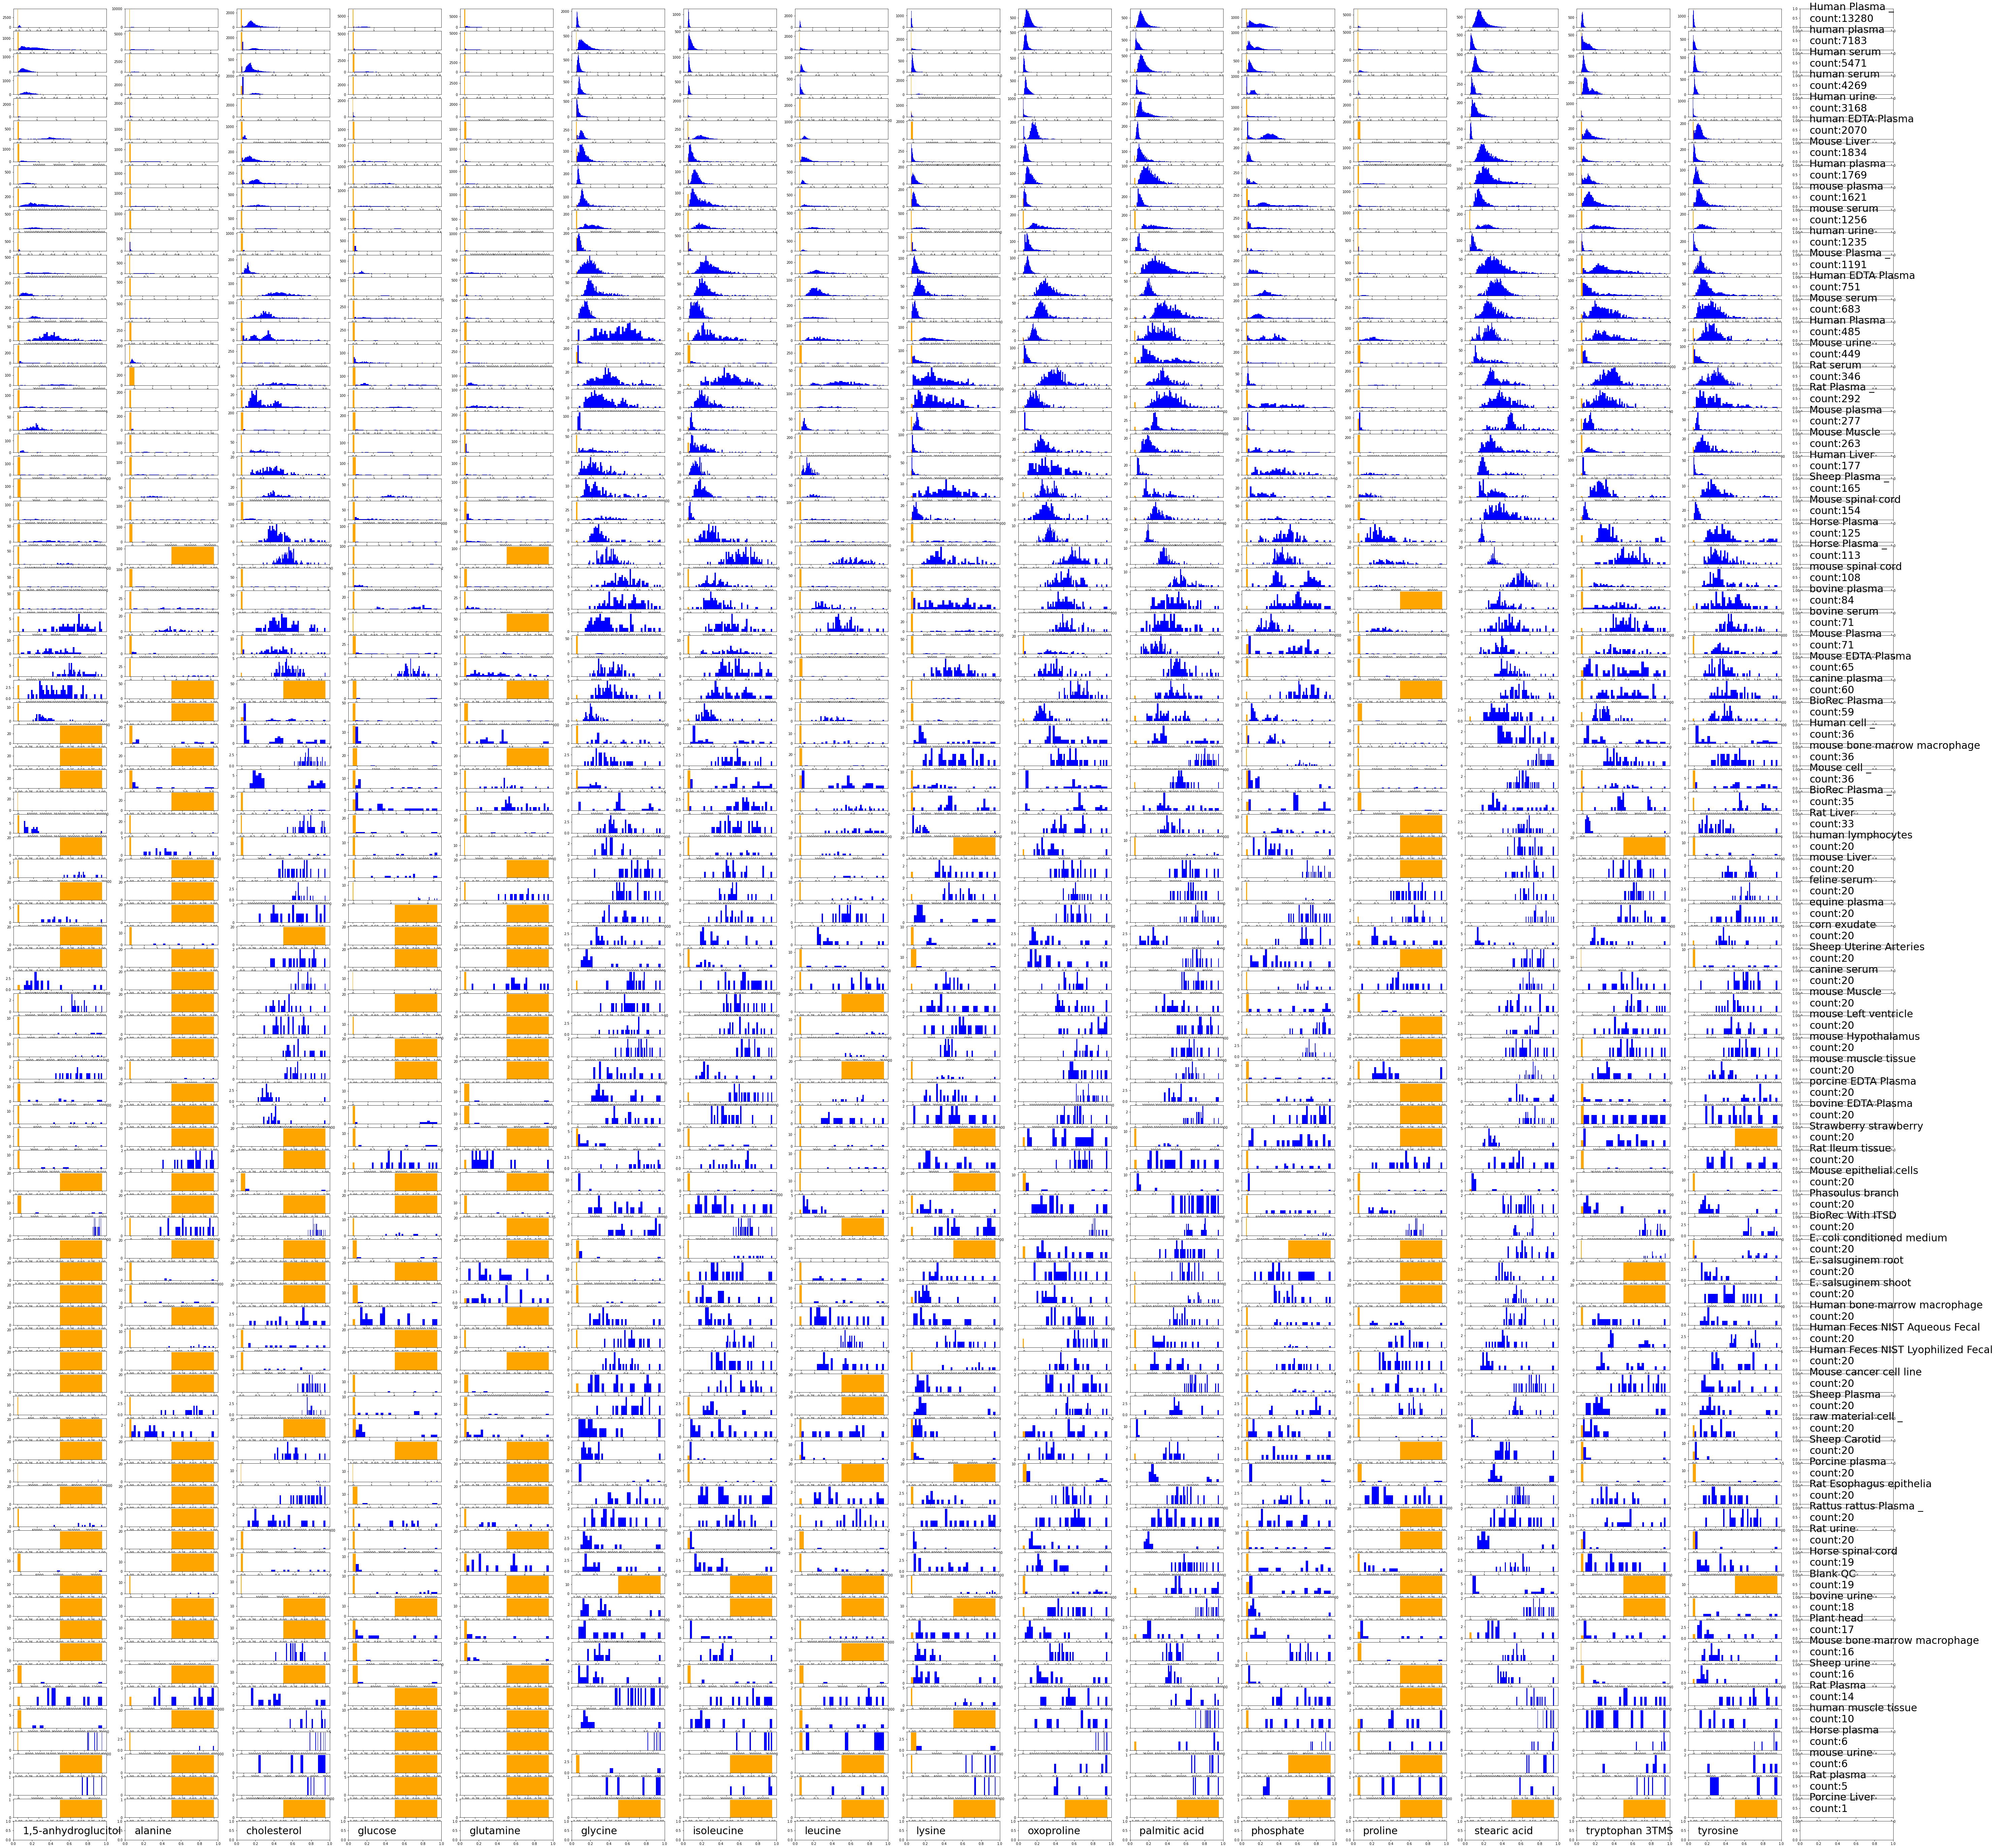

In [40]:

fig,axs=plt.subplots(number_of_metadata+1,number_of_compounds+1,figsize=(100,100))
#fig,axs=plt.subplots(20,16,figsize=(100,100))
#for index,series in histo_info_panda.iterrows():
#for i in range(number_of_metadata):

for i in range(number_of_metadata+1):
    #print(i)
    #for j in range (number_of_compounds):
    

    
    
    for j in range(number_of_compounds+1):
        #print(j)
        
        #print(histo_info_panda.iloc[i,j].x)
        #print(histo_info_panda.iloc[i,j].height)
        
        
        
        
        if j==number_of_compounds and i!=number_of_metadata:
            axs[i,j].set_ylim([0,1],auto=True)
            axs[i,j].set_xlim([0,1],auto=True)
            species_organ_as_string=' '.join(histo_info_panda.iloc[i,0].species_organ)
            axs[i,j].text(
                x=0.1,
                y=0.3,
                fontsize=30,
                s=species_organ_as_string+'\ncount:'+str(histo_info_panda.iloc[i,0].total_sample_count)
            )
            
        if i==number_of_metadata and j!= number_of_compounds:
            axs[i,j].set_ylim([0,1],auto=True)
            axs[i,j].set_xlim([0,1],auto=True)
            #species_organ_as_string=' '.join(histo_info_panda.iloc[0,j].compound)
            axs[i,j].text(
                x=0.1,
                y=0.3,
                fontsize=30,
                #s=species_organ_as_string+'\ncount:'+str(histo_info_panda.iloc[i,0].total_sample_count)
                s=str(histo_info_panda.iloc[0,j].compound)
            )
            
            
        elif j!=number_of_compounds and i!=number_of_metadata:
            if histo_info_panda.iloc[i,j].x != 'no_std_dev':

                temp_color_list=['blue' for i in range(len(histo_info_panda.iloc[i,j].height))]
                temp_color_list[-1]='orange'

                axs[i,j].bar(
                    x=histo_info_panda.iloc[i,j].x,
                    ###x=[np.log2(k) for k in histo_info_panda.iloc[i,j].x],
                    height=histo_info_panda.iloc[i,j].height,
                    width=histo_info_panda.iloc[i,j].width,
                    ###width=np.log2(histo_info_panda.iloc[i,j].width),
                    ###width=1,
                    color=temp_color_list
                )
                #axs[i,j].text(
                #    x=histo_info_panda.iloc[i,j].compound_max*(1/5)/5,
                #    ###x=np.log2(histo_info_panda.iloc[i,j].compound_max*(1/5)/5),
                #    #y=max(histo_info_panda.iloc[i,j].height)*(1/2),
                #    y=(histo_info_panda.iloc[i,j].total_sample_count)//2,
                #    fontsize=20,
                #    #x=1,
                #    #y=1,
                #    s=str(100*sum(histo_info_panda.iloc[i,j].height[:-1])/histo_info_panda.iloc[i,j].total_sample_count)[0:4]+'%'
                #)
                
                #axs[i,j].set_ylim([0,histo_info_panda.iloc[i,j].total_sample_count],auto=True)
                
                #axs[i,j].set_xlim([-histo_info_panda.iloc[i,j].compound_max/40,histo_info_panda.iloc[i,j].compound_max/5],auto=True)
                ###axs[i,j].set_xlim([10,np.log2(histo_info_panda.iloc[i,j].compound_max/5)],auto=True)
                #axs[i,j].axvline(x=histo_info_panda.iloc[i,j].pre_manipulation_average,color='green',linewidth=3)
                ###axs[i,j].axvline(x=np.log2(histo_info_panda.iloc[i,j].pre_manipulation_average),color='green',linewidth=3)

print('hi')
plt.show()
#plt.savefig('./test2.png', facecolor=fig.get_facecolor())



In [42]:
percent_missing_list=list()
for i in range(number_of_metadata+1):
    #print(i)
    #for j in range (number_of_compounds):
    

    
    
    for j in range(number_of_compounds+1):
        if j!=number_of_compounds and i!=number_of_metadata:
            percent_missing_list.append(100*sum(histo_info_panda.iloc[i,j].height[:-1])/histo_info_panda.iloc[i,j].total_sample_count)
            print(histo_info_panda.iloc[i,j].total_sample_count)
        

13280
13280
13280
13280
13280
13280
13280
13280
13280
13280
13280
13280
13280
13280
13280
13280
7183
7183
7183
7183
7183
7183
7183
7183
7183
7183
7183
7183
7183
7183
7183
7183
5471
5471
5471
5471
5471
5471
5471
5471
5471
5471
5471
5471
5471
5471
5471
5471
4269
4269
4269
4269
4269
4269
4269
4269
4269
4269
4269
4269
4269
4269
4269
4269
3168
3168
3168
3168
3168
3168
3168
3168
3168
3168
3168
3168
3168
3168
3168
3168
2070
2070
2070
2070
2070
2070
2070
2070
2070
2070
2070
2070
2070
2070
2070
2070
1834
1834
1834
1834
1834
1834
1834
1834
1834
1834
1834
1834
1834
1834
1834
1834
1769
1769
1769
1769
1769
1769
1769
1769
1769
1769
1769
1769
1769
1769
1769
1769
1621
1621
1621
1621
1621
1621
1621
1621
1621
1621
1621
1621
1621
1621
1621
1621
1256
1256
1256
1256
1256
1256
1256
1256
1256
1256
1256
1256
1256
1256
1256
1256
1235
1235
1235
1235
1235
1235
1235
1235
1235
1235
1235
1235
1235
1235
1235
1235
1191
1191
1191
1191
1191
1191
1191
1191
1191
1191
1191
1191
1191
1191
1191
1191
751
751
751
751
751
751


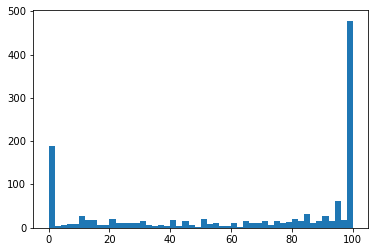

In [43]:
plt.hist(percent_missing_list,bins=50)
plt.show()